# Estadistica aplicada

## Jorge Sebastian Aguirre Jimenez 1947870 G41

## Modelos paramétricos y no paramétricos de supervivencia

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [3]:
quiebra=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/quiebra.csv')

In [4]:
quiebra

,tiempo,mujer,quebrar
0,21,0,1
1,16,1,0
2,26,1,1
3,17,1,0
4,29,1,1
...,...,...,...
95,12,0,1
96,22,0,1
97,30,0,0
98,10,0,0


In [25]:
maxtiempo=quiebra['tiempo'].max()
mintiempo=quiebra['tiempo'].min()

## Función exponencial

In [26]:
exponencial=ExponentialFitter().fit(quiebra['tiempo'],quiebra['quebrar'])

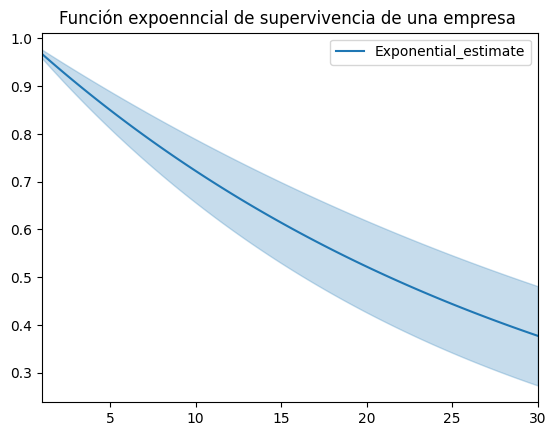

In [27]:
exponencial.plot_survival_function()
plt.title('Función expoenncial de supervivencia de una empresa ')
plt.xlim(mintiempo,maxtiempo);

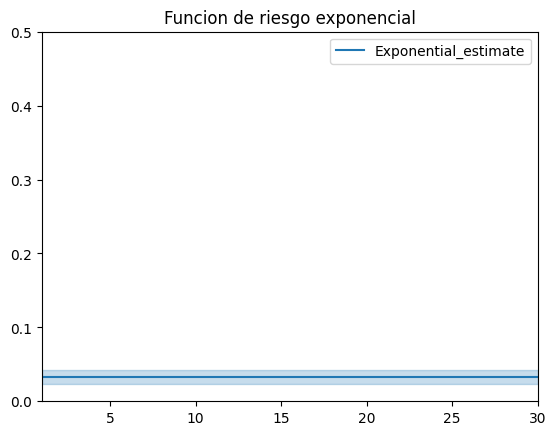

In [28]:
exponencial.plot_hazard()
plt.xlim(mintiempo,maxtiempo)
plt.ylim(0,0.5)
plt.title('Funcion de riesgo exponencial');

# Según una exponencial no importa en que momento este la empresa este siempre va a tener el mismo riesgo de quebrar y su probabilidad de supervivencia va a ser menor entre más pase el tiempo.

## Función Weibull

In [9]:
weibull=WeibullFitter().fit(quiebra['tiempo'], quiebra['quebrar'])

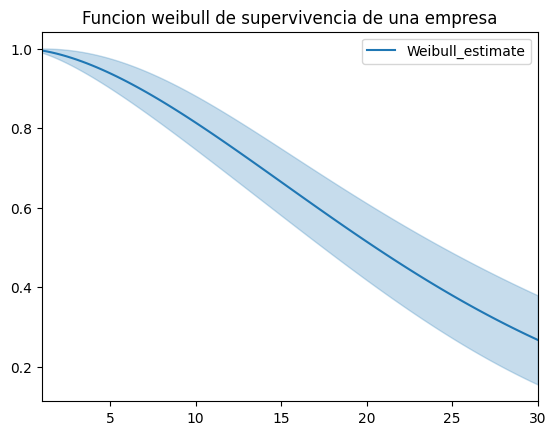

In [29]:
weibull.plot_survival_function()
plt.title('Funcion weibull de supervivencia de una empresa')
plt.xlim(mintiempo,maxtiempo);

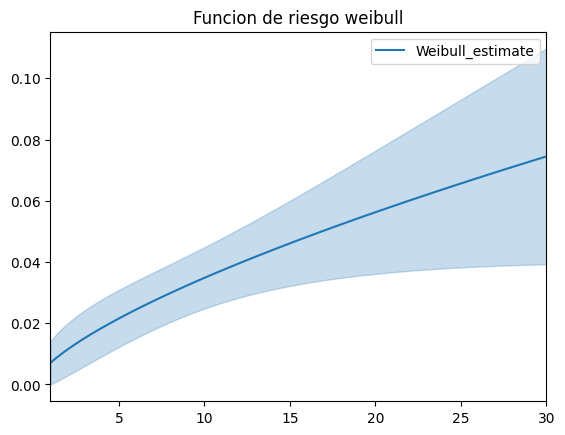

In [30]:
weibull.plot_hazard()
plt.title('Funcion de riesgo weibull')
plt.xlim(mintiempo,maxtiempo);

# La función de riesgo de la weibull es creciente y significa que entre más pasa el tiempo mayor es el riesgo de que una empresa quiebre.

## LogNormal

In [32]:
lognormal=LogNormalFitter().fit(quiebra['tiempo'], quiebra['quebrar'])

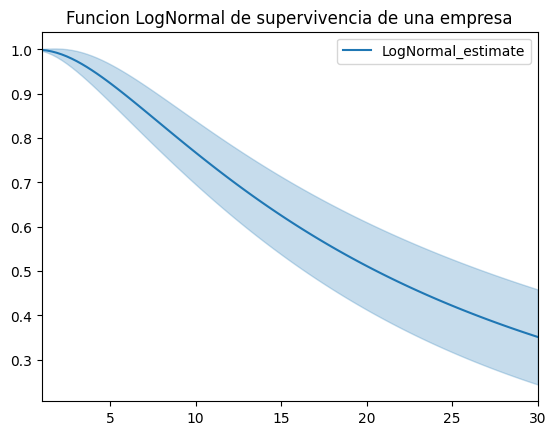

In [33]:
lognormal.plot_survival_function()
plt.title('Funcion LogNormal de supervivencia de una empresa')
plt.xlim(mintiempo,maxtiempo);

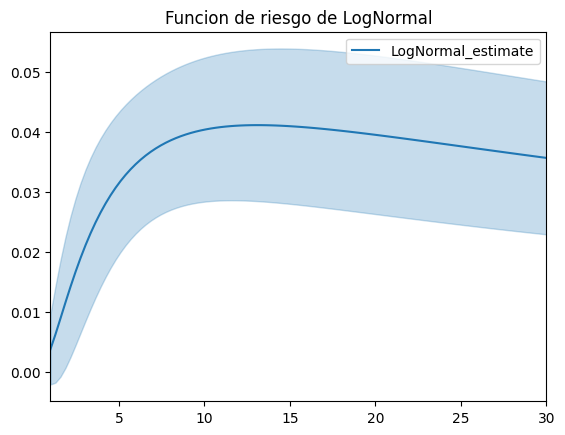

In [34]:
lognormal.plot_hazard()
plt.title('Funcion de riesgo de LogNormal')
plt.xlim(mintiempo, maxtiempo);

# El riesgo se vuelve creciente entre el periodo [0,10] y decreciente en el periodo (10,30]

In [15]:
km=KaplanMeierFitter().fit(quiebra['tiempo'],quiebra['quebrar'])

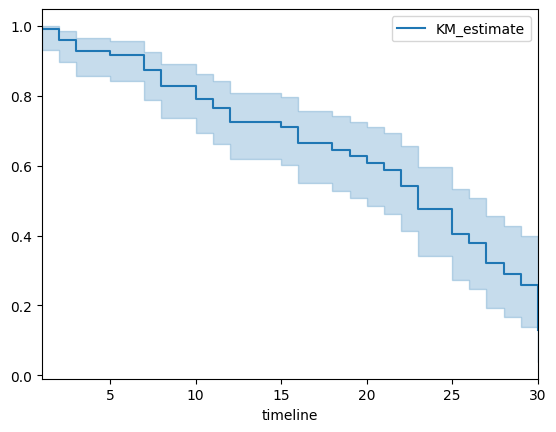

In [35]:
km.plot_survival_function()
plt.xlim(mintiempo,maxtiempo);

In [17]:
km.median_survival_time_

23.0

# La grafica anterior nos indica que entre más pasa el tiempo es más probable es que la empresa quiebre y que para el tiempo 23 la mitad de las empresas ya habrán quedrado.

In [18]:
h=quiebra.query('mujer==0')
m=quiebra.query('mujer==1')

In [19]:
km_h=KaplanMeierFitter().fit(h['tiempo'],h['quebrar'])
km_m=KaplanMeierFitter().fit(m['tiempo'],m['quebrar'])

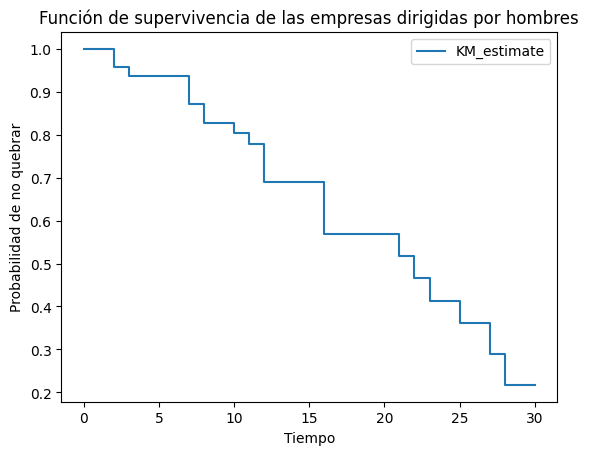

In [36]:
km_h.plot_survival_function(ci_show=False)
plt.xlabel('Tiempo')
plt.ylabel('Probabilidad de no quebrar')
plt.title('Función de supervivencia de las empresas dirigidas por hombres');


In [21]:
km_h.median_survival_time_

22.0

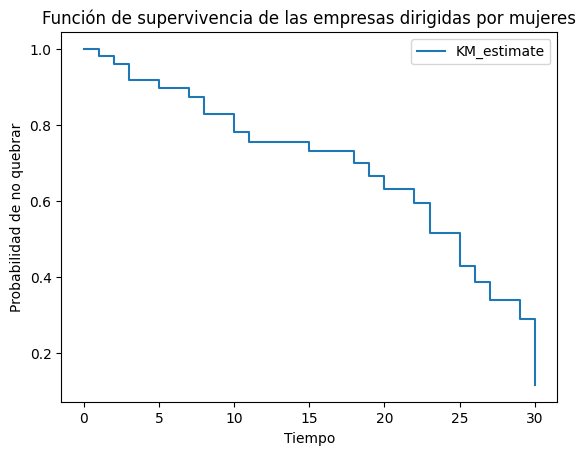

In [37]:
km_m.plot_survival_function(ci_show=False)
plt.xlabel('Tiempo')
plt.ylabel('Probabilidad de no quebrar')
plt.title('Función de supervivencia de las empresas dirigidas por mujeres');

In [23]:
km_m.median_survival_time_

25.0

# De lo anterior podemos observar que las empresas dirigidas por hombres tienden a quebrar más rapido.

# Hipotesis

$ H0: s(1) = s(2) $

$ Ha: s(1) \neq s(2) $

In [24]:
LRT=logrank_test(h['tiempo'],m['tiempo'],h['quebrar'],m['quebrar'])
LRT.print_summary()

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.28 0.59      0.75

In [ ]:
LRT.p_value.round(2)

0.59

# Como tenemos un alpha de 5% y p-value es de 59% podemos concluir que no rechazamos H0 y por ende esto significa que las empresas dirigidas por hombres y mujeres quiebran igual de rapido.